In [16]:
import pandas as pd
import streamlit as st
import datetime
from glob import glob
from PIL import Image
import numpy as np
import base64
import io
import sys
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
if '../app' not in sys.path:
    sys.path.append('../app/')

from utils.locate_timings import bin_confusion, confusion2transcript, normalize_time, bin_confusion_from_df
from utils.identify_theme import send2chatgpt, split_confused_transcripts_by_line


In [17]:
# d = input('Select a session date:')
d = '2019-04-16'
d = datetime.datetime.strptime(str(d).replace('-', ''), "%Y%m%d")


In [18]:
d

datetime.datetime(2019, 4, 16, 0, 0)

In [19]:
select_confused_csv = '../confusion_processed/'+str(d.year)+str(d.month).zfill(2)+str(d.day).zfill(2)+'_confusion.csv'
selected_confused_df = pd.read_csv(select_confused_csv, index_col=0)

In [20]:
selected_confused_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,Confused,Not Confused,Not Confused,Not Confused,Not Confused,Confused,Not Confused,Confused,Confused,Not Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Confused,Confused,Confused,Not Confused,Not Confused,Confused,Not Confused,Confused,Not Confused,Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Confused,Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Not Confused,Not Confused,Not Confused,Confused,Not Confused,Confused,Not Confused,Not Confused,Confused,Not Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
classes = ['Confused', 'Not Confused']
for time in tqdm(selected_confused_df.index):
    # print(time)
    for stu in selected_confused_df.columns:
        # print(selected_confused_df.loc[time, stu])
        if selected_confused_df.loc[time, stu] in classes:
            result = random.randint(0, 1)
            selected_confused_df.loc[time, stu] = classes[result]

    # if selected_confused_df.loc[stu, :] == 'confused':
    #     print('yes')

100%|██████████| 2401/2401 [00:01<00:00, 1725.39it/s]


In [22]:
selected_confused_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,Confused,Not Confused,Confused,Confused,Confused,Confused,Confused,Not Confused,Confused,Not Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Confused,Not Confused,Confused,Confused,Confused,Not Confused,Confused,Not Confused,Confused,Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Not Confused,Confused,Confused,Not Confused,Not Confused,Confused,Confused,Confused,Not Confused,Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Confused,Confused,Not Confused,Confused,Confused,Confused,Not Confused,Confused,Confused,Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Not Confused,Confused,Not Confused,Not Confused,Confused,Not Confused,Not Confused,Confused,Not Confused,Not Confused,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:

avg_1min = bin_confusion_from_df(selected_confused_df)

In [24]:
avg_1min

[0.5106957122398299,
 0.4840193416547906,
 0.5244685352773588,
 0.5022597990245049,
 0.46725330225330225,
 0.4607203907203907,
 0.496851971557854,
 0.5320180620606317,
 0.5273925213360198,
 0.5063896055498222,
 0.5015100455386833,
 0.5304643962848297,
 0.47419432977869513,
 0.4564796181630547,
 0.4827407980736154,
 0.49885033253067307,
 0.5047766884531592,
 0.47929126450293497,
 0.50994954707029,
 0.5059925958687568,
 0.4999403123822629,
 0.49475178960473076,
 0.5181653889626026,
 0.49717133929595225,
 0.5051293124087243,
 0.47615132130225013,
 0.47640513897866843,
 0.464162087912088,
 0.49098873348873345,
 0.4927960927960928,
 0.49844747300629655,
 0.5082574696545284,
 0.4925788590494473,
 0.5076813545931192,
 0.5000357920946156,
 0.5108220856943767,
 0.5089666977902272,
 0.48532609351208755,
 0.5215583075335397,
 0.48267515193211774,
 0.5095033539731683,
 0.4987343767916524,
 0.514863772994578,
 0.5007574491785018,
 0.4918713450292397,
 0.49059523809523814,
 0.4688838722623553,
 0.48

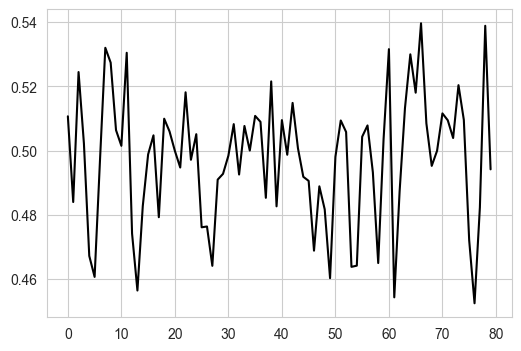

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(avg_1min, color = 'k')
# ax.hlines(c, 0, 80, linestyle='dashed', label='Mean+1SD', color='red')
# ax.text(80, 7.5, 'Mean+1SD', color='red')
# ax.scatter(top_confused_min, np.array(avg_1min)[top_confused_min], color='red', marker='o')
# ax.set_xlabel('In class minutes(March 26th 2019)')
# ax.set_ylabel('confused percentage increase')
# fig.savefig('../figure_panels/fig3d_random.png', bbox_inches='tight', dpi=300)

In [26]:
a = np.min(avg_1min)
avg_1min_above_min = avg_1min/a
c = 2
top_confused_min = np.array(np.where(avg_1min_above_min > c)[0])

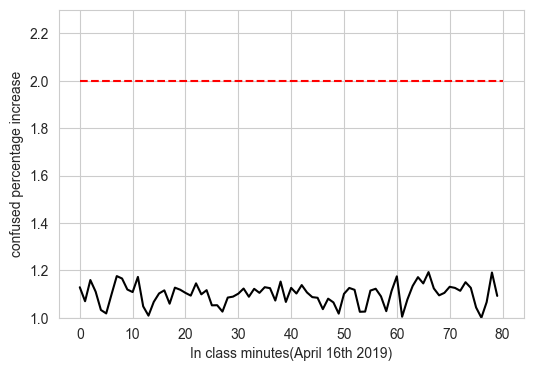

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(avg_1min_above_min, color = 'k')
ax.hlines(c, 0, 80, linestyle='dashed', label='Mean+1SD', color='red')
# ax.text(80, 7.5, 'Mean+1SD', color='red')
ax.scatter(top_confused_min, np.array(avg_1min_above_min)[top_confused_min], color='red', marker='o')
ax.set_xlabel('In class minutes(April 16th 2019)')
ax.set_ylabel('confused percentage increase')
ax.set_ylim([1.0, 2.3])
fig.savefig('../figure_panels/fig4d_random_new.svg', bbox_inches='tight', dpi=300)

In [28]:
np.save('../tmp_data/fig4d_random_0416.npy', avg_1min_above_min)